## Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

#### Frequency Tables:

1- Generate a frequency table for the product category.
* Which are the top 5 most listed product categories?

#### Visualizations:

2- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
* For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [3]:
import pandas as pd

url = 'amz_uk_price_prediction_dataset.csv'

df = pd.read_csv(url)
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [38]:
# Frequency Tables:
# 1- Generate a frequency table for the product category.

# Which are the top 5 most listed product categories?

df_cat = df['category'].value_counts().head()
df_cat = df_cat.to_frame().reset_index()
df_cat.columns = ['category', 'count']
df_cat

,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Beauty'),
  Text(2, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(3, 0, 'Bath & Body'),
  Text(4, 0, 'Birthday Gifts')])

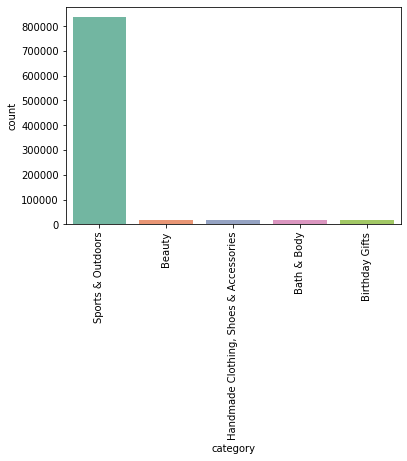

In [122]:
import seaborn as sns

sns.barplot(x=df_cat['category'], y=df_cat["count"], palette="Set2");
plt.xticks(rotation=90)


<AxesSubplot: ylabel='count'>

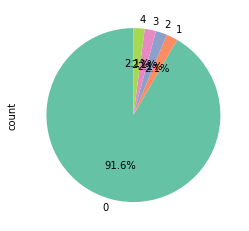

In [51]:
df_cat['count'].plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))

### Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

#### Measures of Centrality:

* Calculate the mean, median, and mode for the price of products.
* What's the average price point of products listed? How does this compare with the most common price point (mode)?

#### Measures of Dispersion:

* Determine the variance, standard deviation, range, and interquartile range for product price.
* How varied are the product prices? Are there any indicators of a significant spread in prices?

#### Visualizations:

* Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
* Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [61]:
# Calculate the mean, median, and mode for the price of products.

print(f"PRICE: {round(df['price'].mean(), 2)}, {df['price'].median()}, {df['price'].mode()}")

PRICE: 89.24, 19.09, 0    9.99
Name: price, dtype: float64


In [60]:
# What's the average price point of products listed? How does this compare with the most common price point (mode)?
# Answer: mode seems to be quite smaller than mean amount

# just to double check if mode is correct:
df['price'].value_counts().sort_values(ascending=False).head()

9.99     48922
12.99    38823
8.99     34058
7.99     33632
14.99    32570
Name: price, dtype: int64

In [73]:
# Determine the variance, standard deviation, range, and interquartile range for product price.

df['price'].describe().apply(lambda x: format(x, 'f'))

count    2443651.000000
mean          89.243809
std          345.608862
min            0.000000
25%            9.990000
50%           19.090000
75%           45.990000
max       100000.000000
Name: price, dtype: object

In [ ]:
# How varied are the product prices? Are there any indicators of a significant spread in prices?
# std is quite bigger than the mean and there is a big difference between min-max amounts which both shows data
# is quite dispersed/spreaded


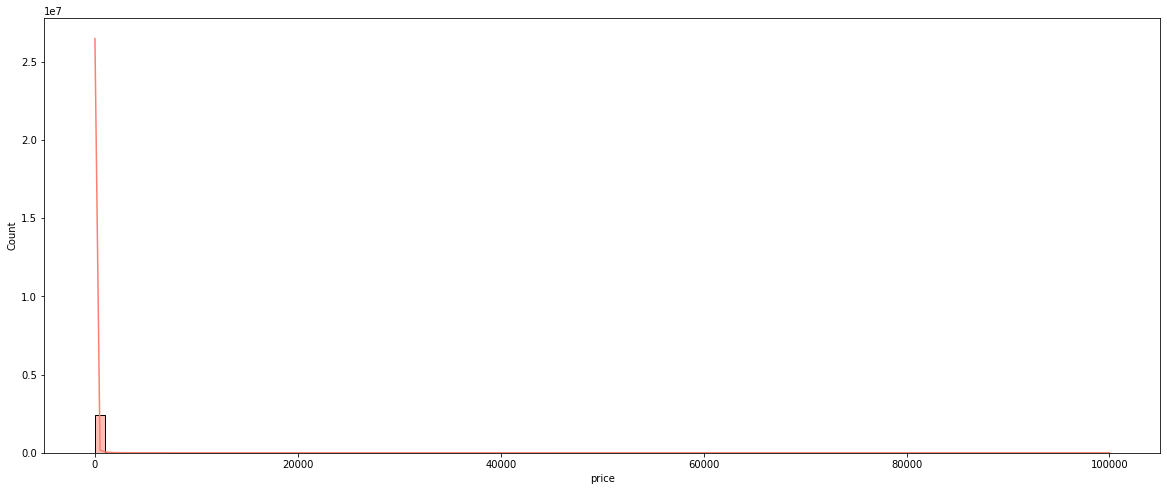

In [81]:
# Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. 
# If its hard to read these diagrams, think why this is, and explain how it could be solved..
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
sns.histplot(df['price'], kde=True, bins=100, color="salmon")

plt.show()

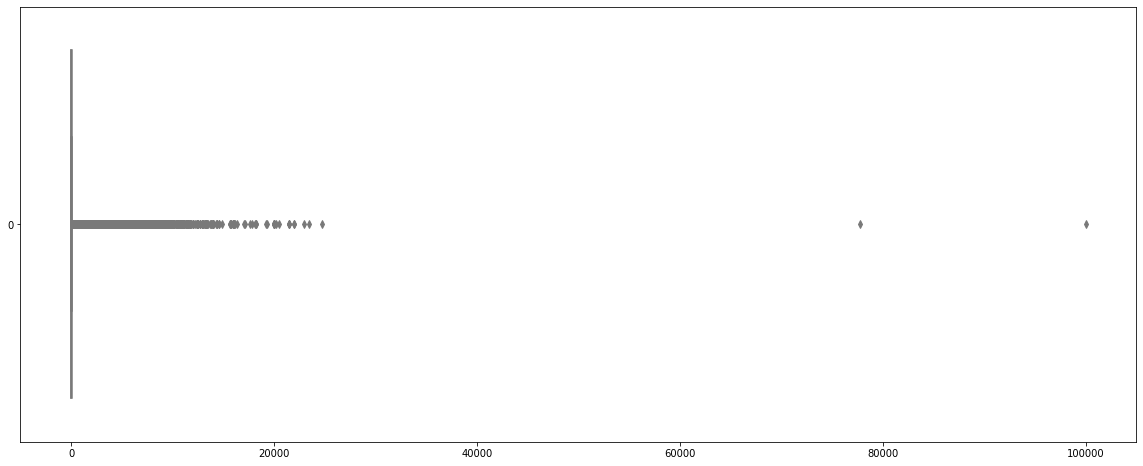

In [83]:
# Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread 
# and potential outliers in product pricing.

#Answer: yes there seems to be 2 products with price tag of 77752$ and 100000$

plt.figure(figsize=(20, 8))
sns.boxplot(data = df['price'], color="lightblue", orient='h')

plt.show()


### art 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

#### Measures of Centrality:

* Calculate the mean, median, and mode for the rating of products.
* How do customers generally rate products? Is there a common trend?

#### Measures of Dispersion:

* Determine the variance, standard deviation, and interquartile range for product rating.
* Are the ratings consistent, or is there a wide variation in customer feedback?

#### Shape of the Distribution:

* Calculate the skewness and kurtosis for the rating column.
* Are the ratings normally distributed, or do they lean towards higher or lower values?

#### Visualizations:

*Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [98]:
# Calculate the mean, median, and mode for the rating of products.

print(f"{df['stars'].mean()}, {df['stars'].median()}, {df['stars'].mode()}")

# How do customers generally rate products? Is there a common trend?
# interestingly 50+% of customers rated and also most of ratings are above 3.5

2.152836472966065, 0.0, 0    0.0
Name: stars, dtype: float64


In [115]:
# Determine the variance, standard deviation, and interquartile range for product rating.

df['stars'].var(), df['stars'].std()
q1 = df['stars'].quantile(0.25)
q3 = df['stars'].quantile(0.75)
q1, q3

interquartile_range = q3 - q1
interquartile_range

print(f"var: {df['stars'].var()}, std: {df['stars'].std()}, Q1: {q1}, Q3: {q3}, InterquartileRange: {interquartile_range}")

# Are the ratings consistent, or is there a wide variation in customer feedback?




var: 4.81743402976196, std: 2.1948653785054697, Q1: 0.0, Q3: 4.4, InterquartileRange: 4.4


In [126]:
# Calculate the skewness and kurtosis for the rating column.

df['stars'].kurtosis(), df['stars'].skew()

# Are the ratings normally distributed, or do they lean towards higher or lower values?





(-1.9260061280432985, 0.08120735761080985)

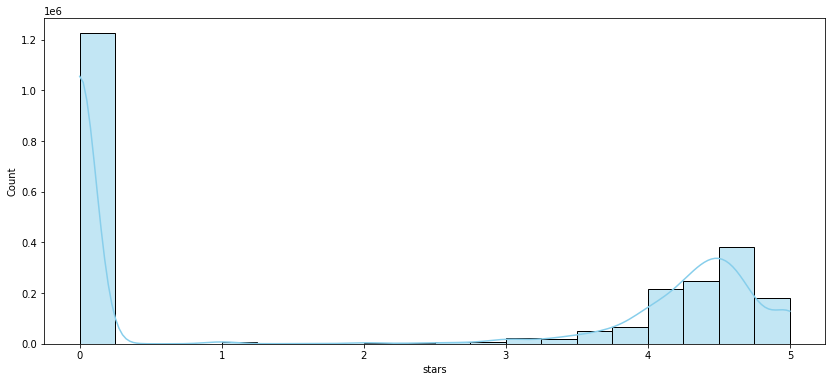

In [136]:
# Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

plt.figure(figsize=(14, 6))
sns.histplot(data = df['stars'], bins=20, kde=True, color='skyblue')
plt.title=('Histogram')
plt.show()
